## Predicting Baby’s Birth Weight Based on Parental and Pregnancy Factors

Firstly lets split our project into parts
1. Import  Libraries
2. load dataset
3. Data cleaning
4. EDA
5. In eda lets split into 3 parts
- Univarient
- Bivarient
- multivarient
  
6. Machine learning
- I am using here Random Forest and XGBoost for predicting
- After this evaluting uisng metircs  and check accuracy

## Importing Libraries

In [5]:
import pandas as pd  # data manipulation and analysis
import numpy as np  # Numerical operations

# Visualization
import matplotlib.pyplot as plt # Plotting basic graphs
import seaborn as sns # Plotting basic "graphs  (1).ipynb"

import warnings
warnings.filterwarnings('ignore') # To ignore unnecessary warning

## Dataset overview

| **Column**   | **Description**                                                                                             |
| ------------ | ----------------------------------------------------------------------------------------------------------- |
| **SEX**      | Sex of the baby (categorical; 1 = Male, 2 = Female); relevant as birth weight can differ by sex.            |
| **MARITAL**  | Marital status of the parents (coded); may relate to socioeconomic or support factors.                      |
| **FAGE**     | Age of the father in years; extreme ages might affect pregnancy outcomes.                                   |
| **GAINED**   | Weight gained by the mother during pregnancy (numeric); directly influences baby’s growth and birth weight. |
| **VISITS**   | Number of prenatal care visits; more visits may reflect better health care access.                          |
| **MAGE**     | Age of the mother in years; younger or older maternal age can impact birth outcomes.                        |
| **FEDUC**    | Father’s total years of education; higher education may relate to better awareness and resources.           |
| **MEDUC**    | Mother’s total years of education; often linked to maternal health and prenatal care.                       |
| **TOTALP**   | Total number of pregnancies the mother has had; higher parity may affect pregnancy risk.                    |
| **BDEAD**    | Number of children previously born alive but now deceased; may indicate previous poor pregnancy outcomes.   |
| **TERMS**    | Number of other terminations (miscarriages or abortions); can be a risk indicator.                          |
| **LOUTCOME** | Outcome of the last delivery (coded); provides context on recent pregnancy result.                          |
| **WEEKS**    | Number of completed weeks of gestation; strongly determines birth weight (premature vs full-term).          |
| **RACEMOM**  | Mother's race (coded: e.g., 2 = White, 3 = Black, see codebook); can relate to genetic and social factors.  |
| **RACEDAD**  | Father's race (coded: see above); possible genetic/social associations.                                     |
| **HISPMOM**  | Hispanic origin of mother (coded: e.g., C = Cuban, N = Not Hispanic); cultural and genetic context.         |
| **HISPDAD**  | Hispanic origin of father (coded); as above for the father.                                                 |
| **CIGNUM**   | Average number of cigarettes mother smoked daily; smoking is a key risk factor for low birth weight.        |
| **DRINKNUM** | Average number of alcoholic drinks mother consumed daily; prenatal alcohol affects fetal development.       |
| **ANEMIA**   | Mother had anemia during pregnancy (0 = No, 1 = Yes); anemia can reduce oxygen supply to fetus.             |
| **CARDIAC**  | Mother had cardiac disease during pregnancy (binary); impacts maternal and fetal health.                    |
| **ACLUNG**   | Mother had acute/chronic lung disease (binary); may reduce fetal oxygenation.                               |
| **DIABETES** | Mother had diabetes during pregnancy (binary); can lead to higher or lower birth weights.                   |
| **HERPES**   | Mother had genital herpes during pregnancy (binary); can affect birth process and infant health.            |
| **HYDRAM**   | Mother had hydramnios/oligohydramnios (binary; abnormal amniotic fluid); linked to complications.           |
| **HEMOGLOB** | Mother had hemoglobinopathy (binary); affects oxygen transport.                                             |
| **HYPERCH**  | Mother had chronic hypertension (binary); a known risk for low birth weight.                                |
| **HYPERPR**  | Mother had hypertension of pregnancy (binary); impacts fetal growth.                                        |
| **ECLAMP**   | Mother had eclampsia (binary); severe pregnancy complication affecting baby’s development.                  |
| **CERVIX**   | Mother had incompetent cervix (binary); raises risk of premature birth.                                     |
| **PINFANT**  | Mother had a previous infant >4000g (binary); may suggest genetic tendency for larger babies.               |
| **PRETERM**  | Mother had previous preterm/small infant (binary); can indicate risk of future preterm birth.               |
| **RENAL**    | Mother had renal disease (binary); kidney disease can impact fetal growth.                                  |
| **RHSEN**    | Mother had Rh sensitization (binary); immune reaction that may affect the fetus.                            |
| **UTERINE**  | Mother had uterine bleeding (binary); may signal pregnancy complications.                                   |
| **BWEIGHT**  | Baby’s weight at birth (continuous, target variable); indicator of newborn health and development.          |


## Load the Dataset

In [9]:
df = pd.read_csv("baby-weights-dataset.csv")

In [10]:
df.columns

Index(['ID', 'SEX', 'MARITAL', 'FAGE', 'GAINED', 'VISITS', 'MAGE', 'FEDUC',
       'MEDUC', 'TOTALP', 'BDEAD', 'TERMS', 'LOUTCOME', 'WEEKS', 'RACEMOM',
       'RACEDAD', 'HISPMOM', 'HISPDAD', 'CIGNUM', 'DRINKNUM', 'ANEMIA',
       'CARDIAC', 'ACLUNG', 'DIABETES', 'HERPES', 'HYDRAM', 'HEMOGLOB',
       'HYPERCH', 'HYPERPR', 'ECLAMP', 'CERVIX', 'PINFANT', 'PRETERM', 'RENAL',
       'RHSEN', 'UTERINE', 'BWEIGHT', 'NEWBORN_WEIGHT'],
      dtype='object')

In [11]:
df.head() # First 5 columns of the datset

,ID,SEX,MARITAL,FAGE,GAINED,VISITS,MAGE,FEDUC,MEDUC,TOTALP,...,HYPERPR,ECLAMP,CERVIX,PINFANT,PRETERM,RENAL,RHSEN,UTERINE,BWEIGHT,NEWBORN_WEIGHT
0,2001,2,1,33,26.0,10,34,12.0,4,2,...,0,0,0,0,0,0,0,0,4.3750,NaN
1,2002,2,2,19,40.0,10,18,11.0,12,1,...,0,0,0,0,0,0,0,0,6.9375,NaN
2,2003,2,1,33,16.0,14,31,16.0,16,2,...,0,0,0,0,0,0,0,0,8.5000,NaN
3,2004,1,1,25,40.0,15,28,12.0,12,3,...,0,0,0,0,0,0,0,0,8.5000,NaN
4,2005,1,2,21,60.0,13,20,12.0,14,2,...,1,0,0,0,0,0,0,0,9.0000,NaN


In [12]:
df.tail() # Last 5 columns of the datset

,ID,SEX,MARITAL,FAGE,GAINED,VISITS,MAGE,FEDUC,MEDUC,TOTALP,...,HYPERPR,ECLAMP,CERVIX,PINFANT,PRETERM,RENAL,RHSEN,UTERINE,BWEIGHT,NEWBORN_WEIGHT
101395,103396,1,2,36,0.0,9,34,3.0,12,4,...,0,0,0,0,0,0,0,0,9.125,NaN
101396,103397,2,2,21,39.0,11,19,12.0,9,2,...,0,0,0,0,0,0,0,0,7.375,NaN
101397,103398,2,1,27,37.0,15,22,12.0,12,2,...,0,0,0,0,0,0,0,0,7.500,NaN
101398,103399,1,1,27,26.0,12,24,12.0,14,1,...,0,0,0,0,0,0,0,0,7.625,NaN
101399,103400,1,2,20,31.0,15,17,12.0,11,1,...,0,0,0,0,0,0,0,0,6.250,NaN


In [13]:
df.shape # shape of the datset

(101400, 38)

In [14]:
df.info # data types and non null values

<bound method DataFrame.info of             ID  SEX  MARITAL  FAGE  GAINED  VISITS  MAGE  FEDUC  MEDUC  \
0         2001    2        1    33    26.0      10    34   12.0      4   
1         2002    2        2    19    40.0      10    18   11.0     12   
2         2003    2        1    33    16.0      14    31   16.0     16   
3         2004    1        1    25    40.0      15    28   12.0     12   
4         2005    1        2    21    60.0      13    20   12.0     14   
...        ...  ...      ...   ...     ...     ...   ...    ...    ...   
101395  103396    1        2    36     0.0       9    34    3.0     12   
101396  103397    2        2    21    39.0      11    19   12.0      9   
101397  103398    2        1    27    37.0      15    22   12.0     12   
101398  103399    1        1    27    26.0      12    24   12.0     14   
101399  103400    1        2    20    31.0      15    17   12.0     11   

        TOTALP  ...  HYPERPR  ECLAMP  CERVIX  PINFANT  PRETERM  RENAL RHSEN  \


In [15]:
df.describe().T # # Check basic data summary for numeric variables

,count,mean,std,min,25%,50%,75%,max
ID,101400.0,52700.500000,29271.802985,2001.0000,27350.750,52700.500,78050.2500,103400.0000
SEX,101400.0,1.485671,0.500349,1.0000,1.000,1.000,2.0000,9.0000
MARITAL,101400.0,1.303817,0.459907,1.0000,1.000,1.000,2.0000,2.0000
FAGE,101400.0,30.174477,6.775576,14.0000,25.000,30.000,35.0000,74.0000
GAINED,101399.0,30.283040,13.615468,0.0000,21.000,30.000,39.0000,98.0000
VISITS,101400.0,12.436943,3.728901,0.0000,10.000,12.000,15.0000,49.0000
MAGE,101400.0,27.736312,5.957369,11.0000,23.000,28.000,32.0000,53.0000
FEDUC,101399.0,12.926883,2.926582,0.0000,12.000,12.000,16.0000,17.0000
MEDUC,101400.0,13.256489,2.932693,0.0000,12.000,13.000,16.0000,17.0000
TOTALP,101400.0,2.378462,1.490272,1.0000,1.000,2.000,3.0000,20.0000


In [16]:
df.isnull().sum() # checking null values

ID                     0
SEX                    0
MARITAL                0
FAGE                   0
GAINED                 1
VISITS                 0
MAGE                   0
FEDUC                  1
MEDUC                  0
TOTALP                 0
BDEAD                  0
TERMS                  0
LOUTCOME               0
WEEKS                  1
RACEMOM                0
RACEDAD                0
HISPMOM                0
HISPDAD                0
CIGNUM                 1
DRINKNUM               0
ANEMIA                 0
CARDIAC                0
ACLUNG                 0
DIABETES               0
HERPES                 0
HYDRAM                 1
HEMOGLOB               0
HYPERCH                0
HYPERPR                0
ECLAMP                 0
CERVIX                 0
PINFANT                0
PRETERM                0
RENAL                  0
RHSEN                  0
UTERINE                0
BWEIGHT                0
NEWBORN_WEIGHT    101400
dtype: int64

In [17]:
df.shape

(101400, 38)

In [18]:
# Fill missing values in numeric columns with the median value
for col in df.select_dtypes(include=['float64', 'int64']):  # Loop through all numeric columns
    if df[col].isnull().sum() > 0:                         # If there are any missing values in this column
        df[col].fillna(df[col].median(), inplace=True)      # Replace missing values with the column's median

# Fill missing values in categorical columns with the mode (most frequent value)
for col in df.select_dtypes(include=['object', 'category']):  # Loop through all categorical/object columns
    if df[col].isnull().sum() > 0:                           # If there are any missing values in this column
        df[col].fillna(df[col].mode()[0], inplace=True)       # Replace missing values with the column's mode


In [19]:
df.duplicated().sum() # Checking dupliactes 

0

In [20]:
df.shape

(101400, 38)

In [21]:
# List all categorical columns
categorical_cols = ['SEX', 'MARITAL', 'RACEMOM', 'RACEDAD', 'HISPMOM', 'HISPDAD']

# Convert to category dtype
for col in categorical_cols:
    df[col] = df[col].astype('category')


In [22]:
print(df[['MAGE', 'FAGE', 'GAINED', 'WEEKS', 'CIGNUM', 'DRINKNUM']].describe())

                MAGE           FAGE         GAINED          WEEKS  \
count  101400.000000  101400.000000  101400.000000  101400.000000   
mean       27.736312      30.174477      30.283037      38.735562   
std         5.957369       6.775576      13.615401       2.505075   
min        11.000000      14.000000       0.000000      18.000000   
25%        23.000000      25.000000      21.000000      38.000000   
50%        28.000000      30.000000      30.000000      39.000000   
75%        32.000000      35.000000      39.000000      40.000000   
max        53.000000      74.000000      98.000000      45.000000   

              CIGNUM       DRINKNUM  
count  101400.000000  101400.000000  
mean        0.726026       0.005552  
std         2.977259       0.207785  
min         0.000000       0.000000  
25%         0.000000       0.000000  
50%         0.000000       0.000000  
75%         0.000000       0.000000  
max        60.000000      40.000000  


In [23]:
# If you spot impossible values (e.g., negative ages or weeks > 45), consider filtering them out
df = df[(df['MAGE'] >= 13) & (df['MAGE'] <= 55)]
df = df[(df['FAGE'] >= 15) & (df['FAGE'] <= 80)]
df = df[(df['WEEKS'] >= 20) & (df['WEEKS'] <= 45)]

In [24]:
#  Drop Unnecessary Columns
df = df.drop(columns=['ID', 'NEWBORN_WEIGHT'], errors='ignore')

## EDA(Exploratory Data Analysis)

### Univariate analysis

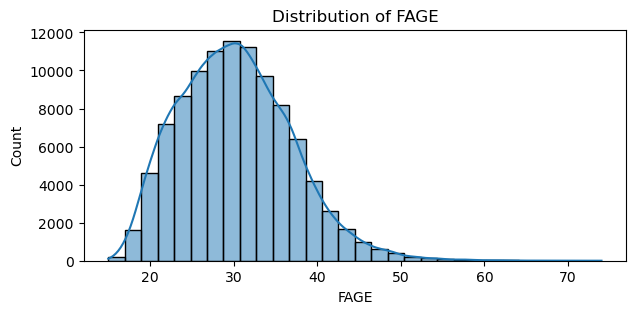

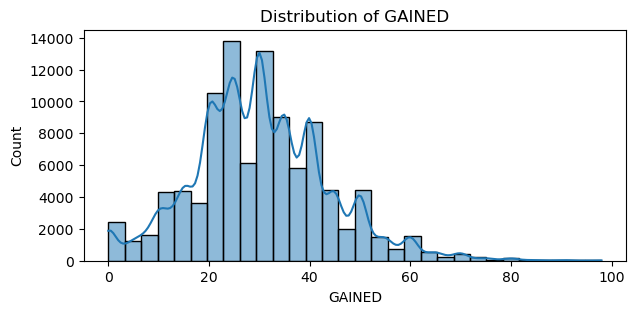

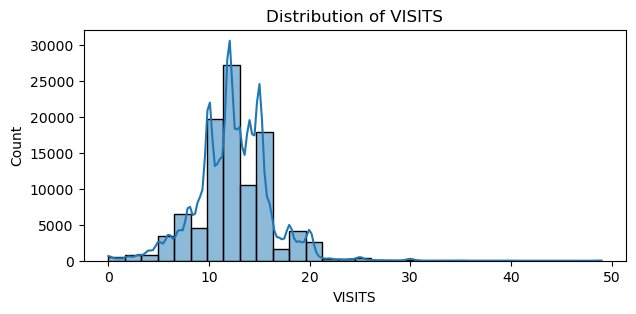

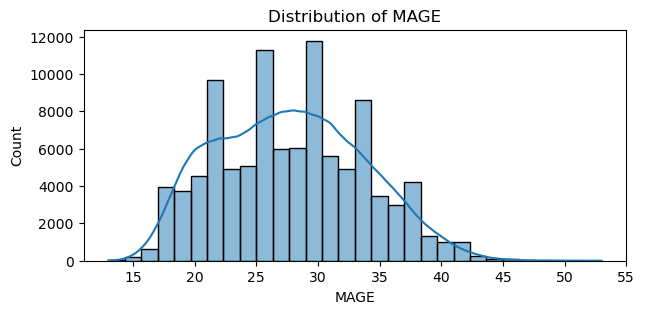

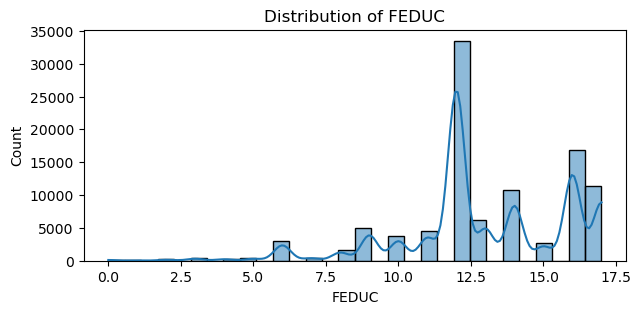

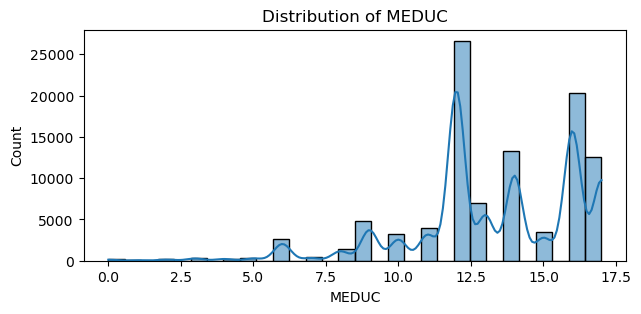

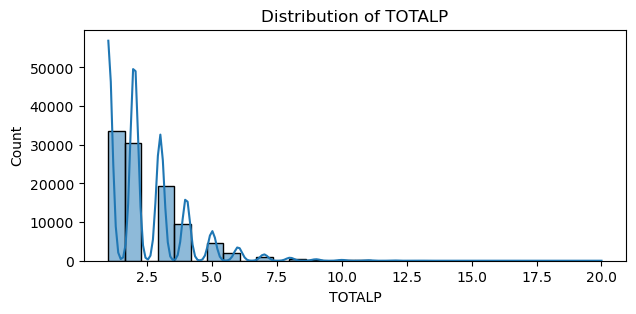

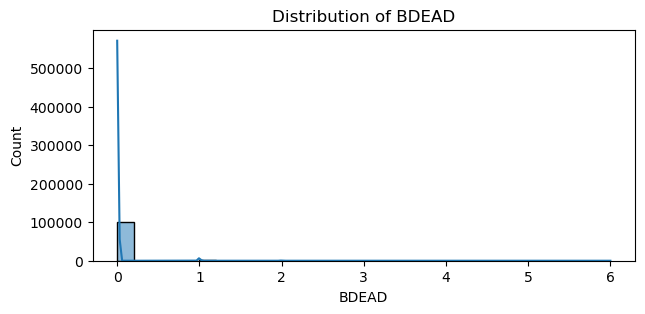

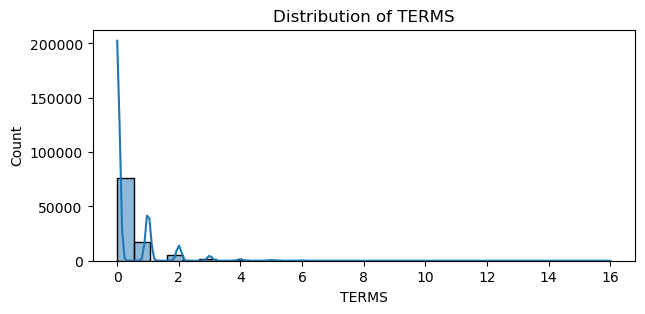

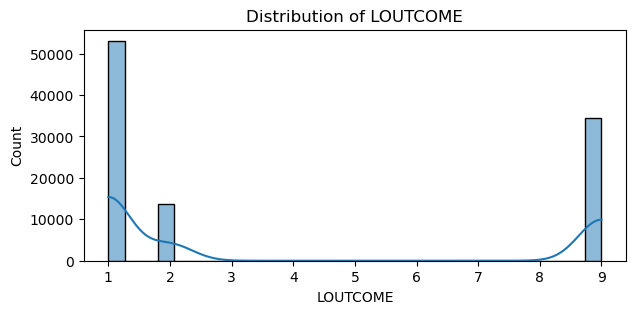

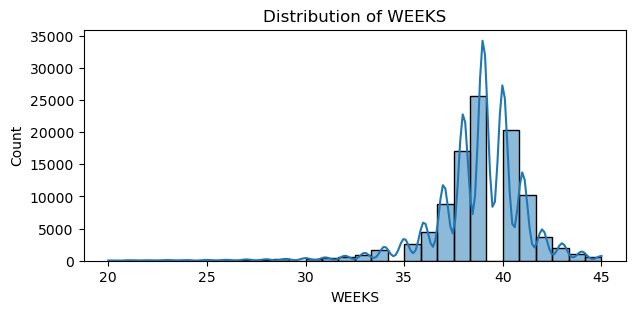

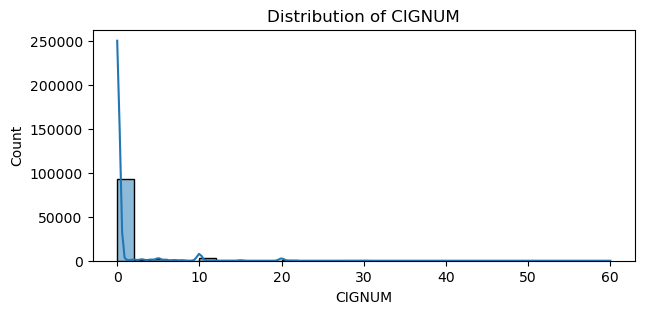

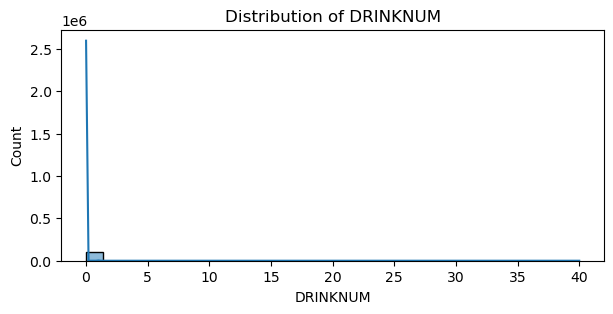

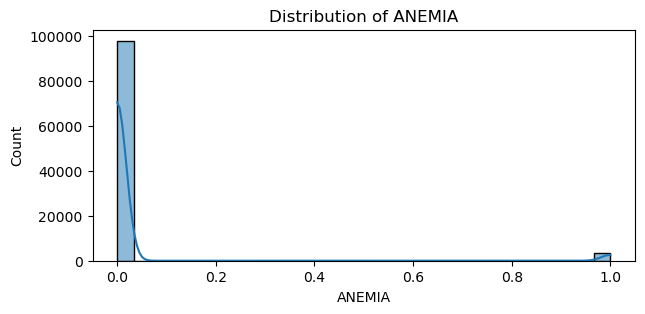

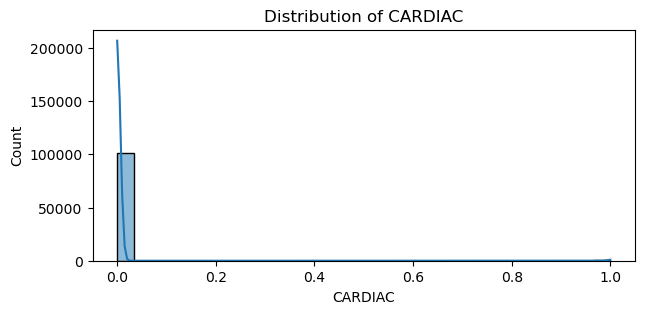

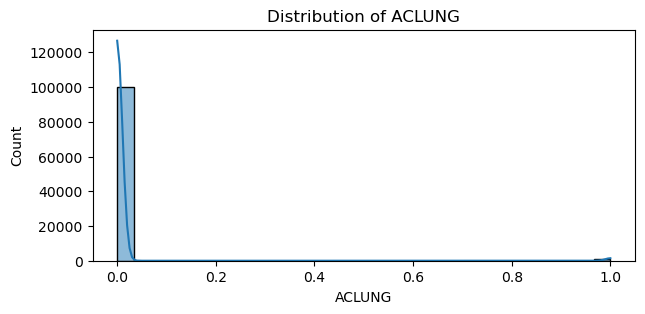

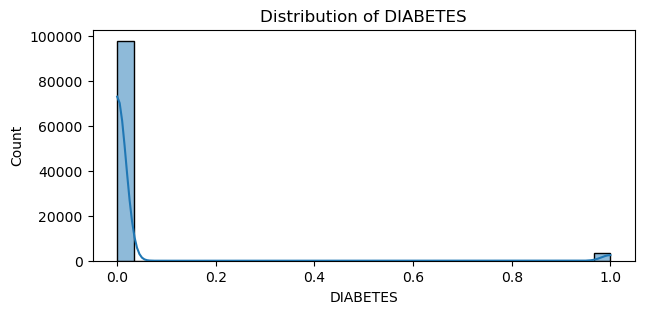

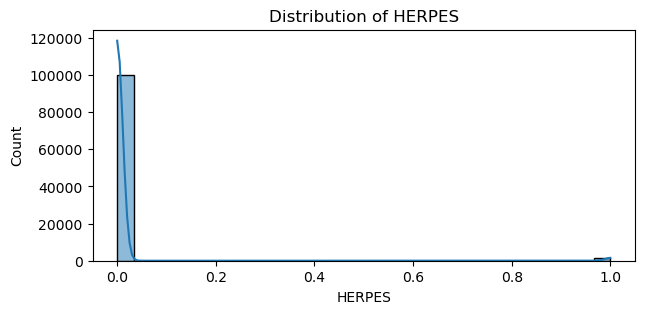

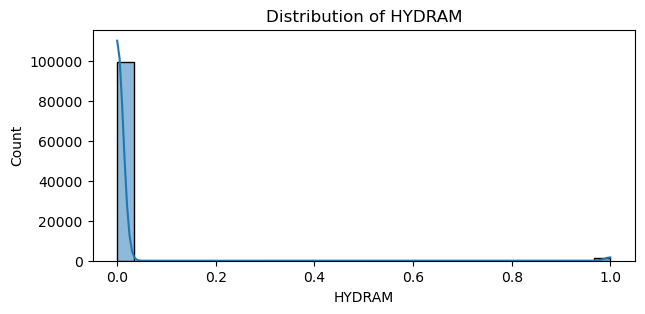

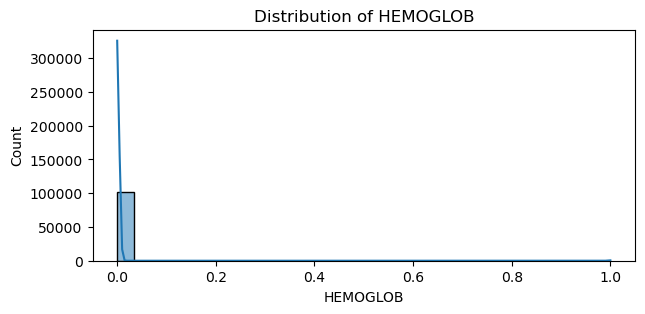

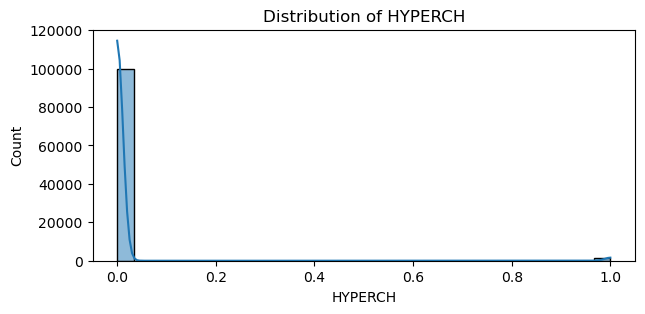

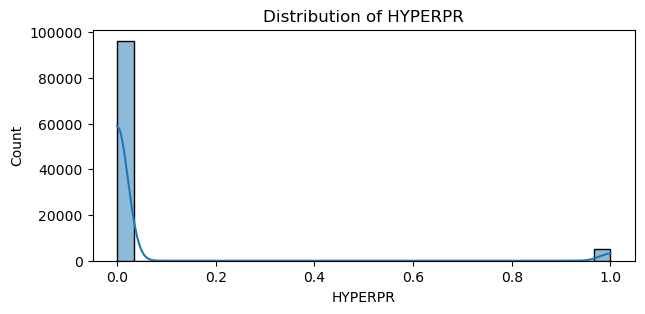

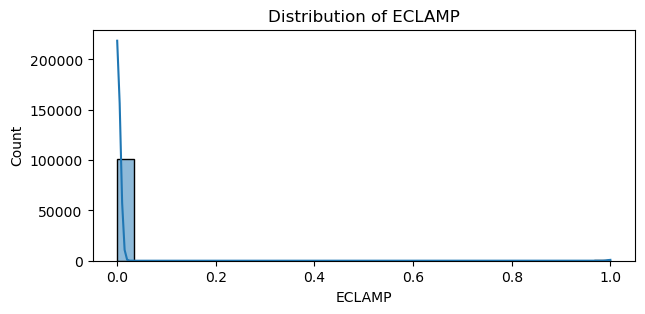

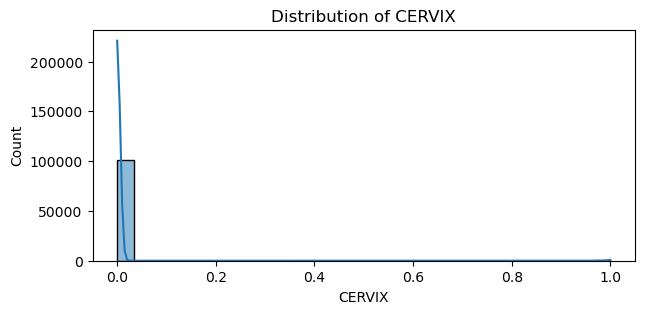

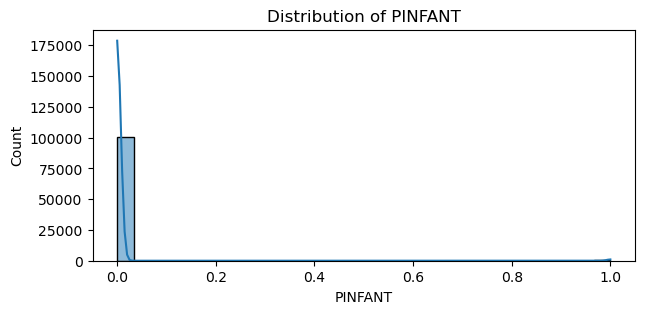

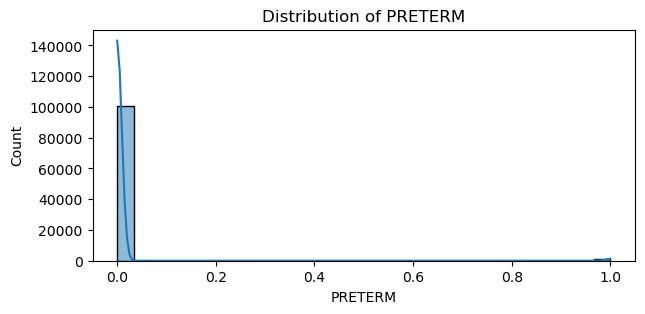

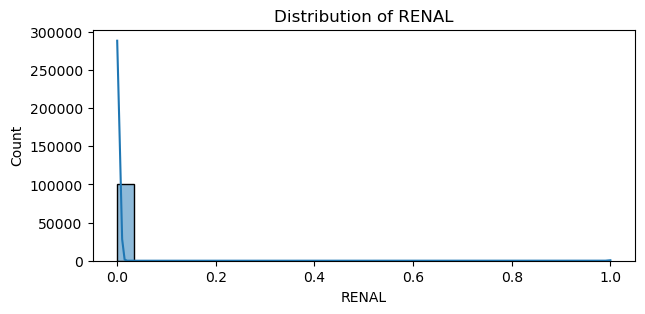

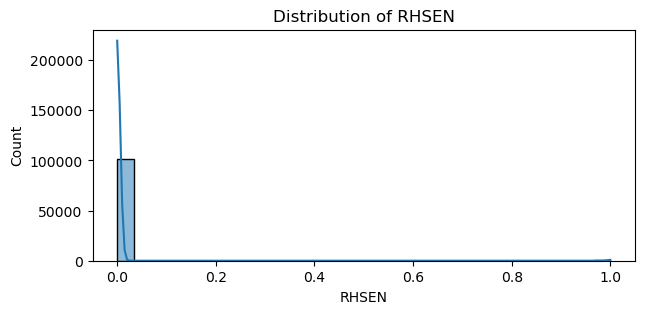

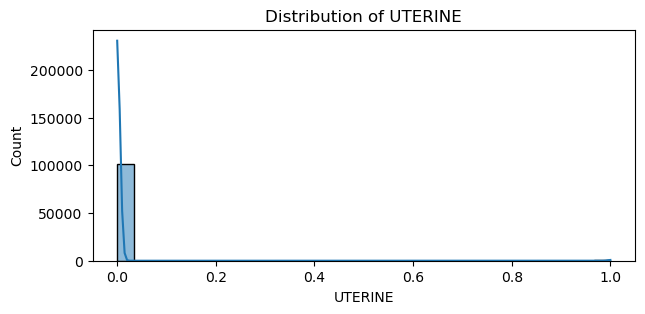

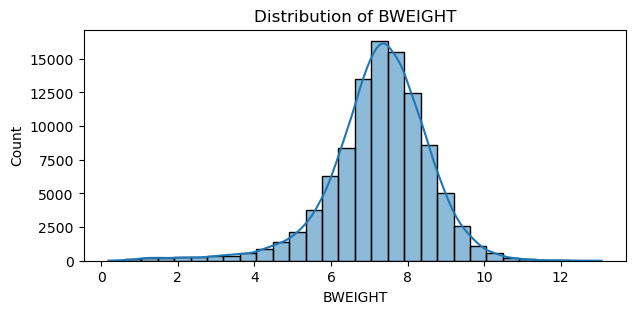

In [27]:
## Numerical Columns: Distribution, Outliers, Summary

num_cols = df.select_dtypes(include=['int64', 'float64']).columns

for col in num_cols:
    plt.figure(figsize=(7, 3))
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.show()

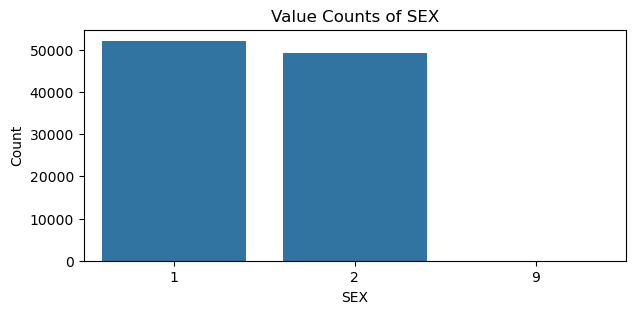


SEX value counts:
SEX
1    52143
2    49221
9        1
Name: count, dtype: int64



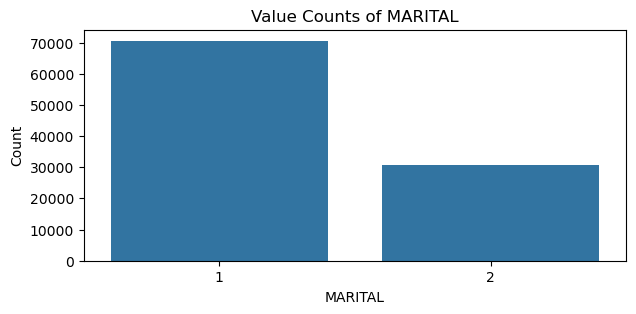


MARITAL value counts:
MARITAL
1    70575
2    30790
Name: count, dtype: int64



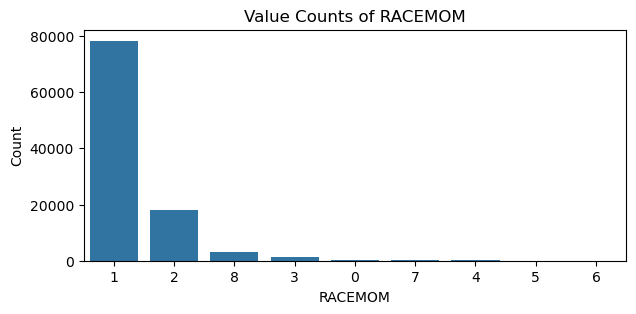


RACEMOM value counts:
RACEMOM
1    78323
2    18000
8     3269
3     1196
0      224
7      159
4      132
5       42
6       20
Name: count, dtype: int64



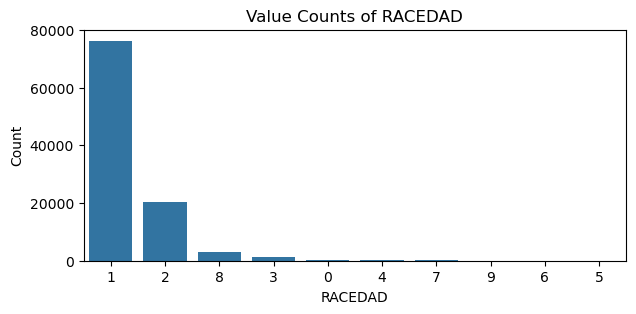


RACEDAD value counts:
RACEDAD
1    76264
2    20486
8     2915
3     1190
0      205
4      123
7       97
9       50
6       18
5       17
Name: count, dtype: int64



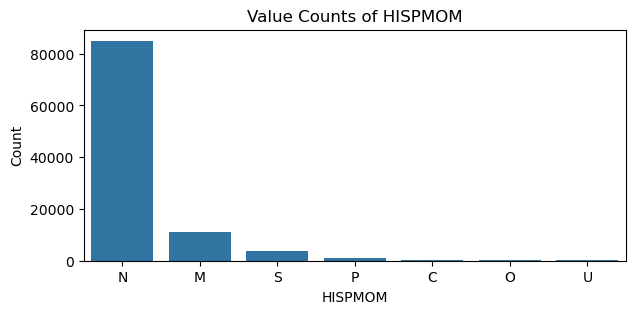


HISPMOM value counts:
HISPMOM
N    85011
M    11285
S     3756
P      901
C      185
O      135
U       92
Name: count, dtype: int64



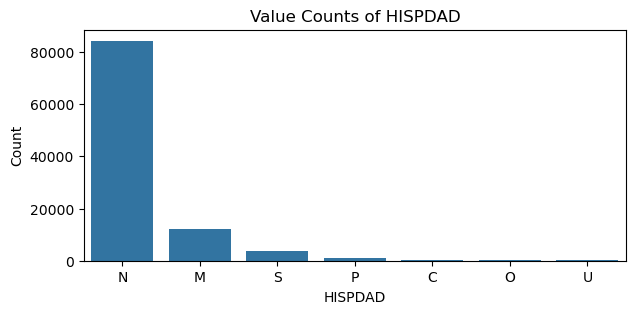


HISPDAD value counts:
HISPDAD
N    84271
M    12034
S     3771
P      884
C      186
O      118
U      101
Name: count, dtype: int64



In [28]:
cat_cols = df.select_dtypes(include=['category', 'object']).columns

for col in cat_cols:
    plt.figure(figsize=(7, 3))
    sns.countplot(x=col, data=df, order=df[col].value_counts().index)
    plt.title(f'Value Counts of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.show()
    
    print(f"\n{col} value counts:\n{df[col].value_counts()}\n")

## 2. Bivariate Analysis 

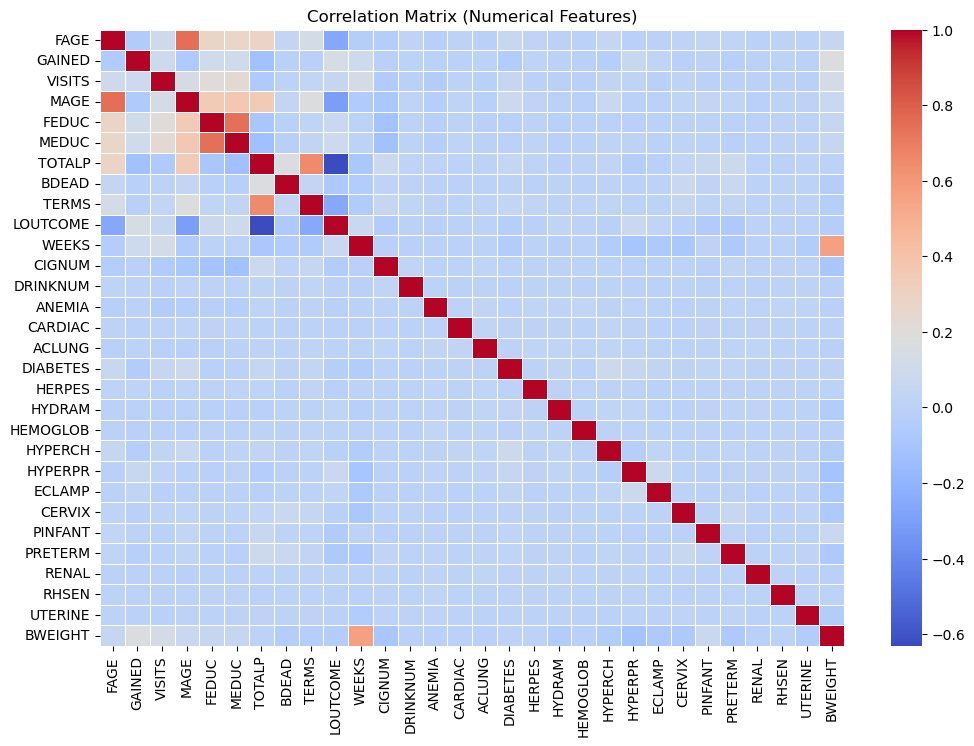

In [30]:
# Correlation Heatmap: Numeric features
plt.figure(figsize=(12,8))
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=False, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix (Numerical Features)')
plt.show()

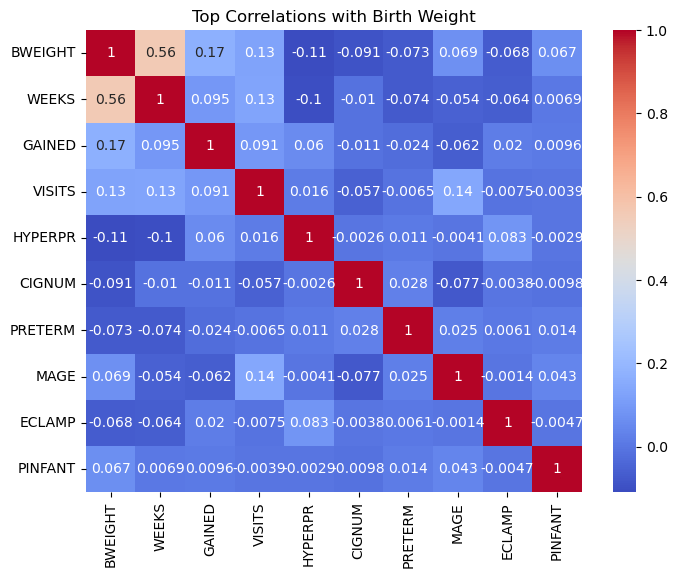

In [31]:
# Focused heatmap: Top 10 features most correlated with BWEIGHT
top_corr = corr['BWEIGHT'].abs().sort_values(ascending=False).head(10).index
plt.figure(figsize=(8,6))
sns.heatmap(df[top_corr].corr(), annot=True, cmap='coolwarm')
plt.title('Top Correlations with Birth Weight')
plt.show()

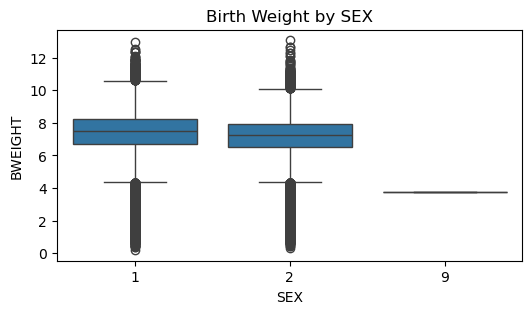

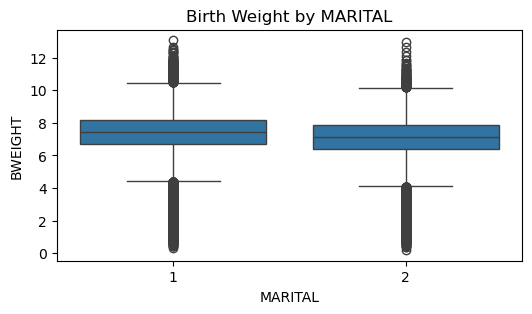

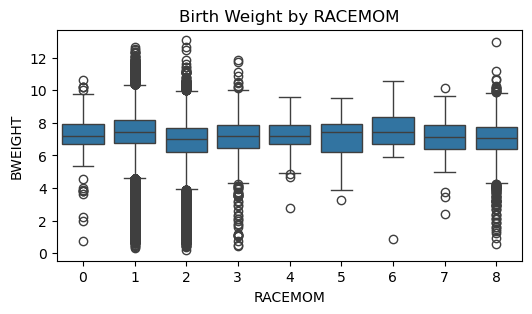

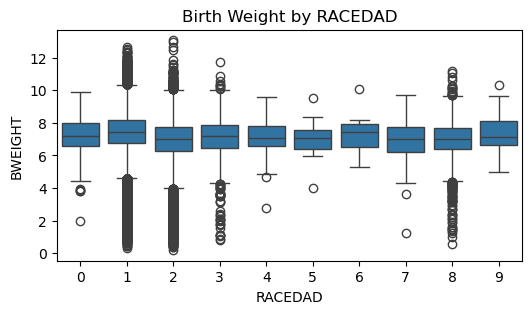

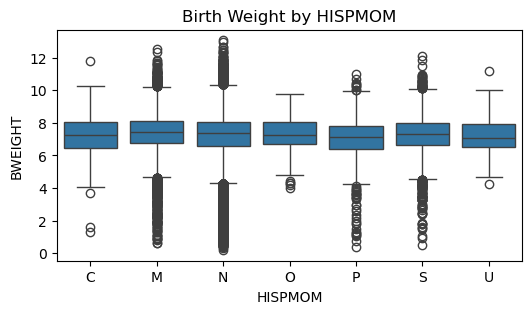

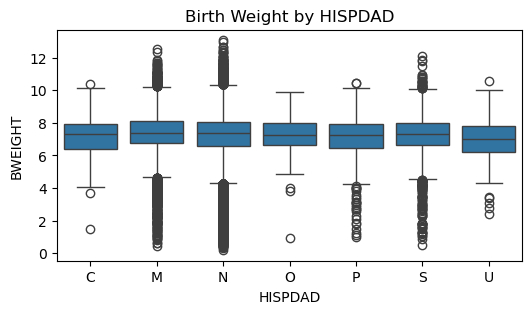

In [32]:
# Boxplot: Birth Weight by Categorical Features (example: SEX)
for col in cat_cols:
    plt.figure(figsize=(6, 3))
    sns.boxplot(x=col, y='BWEIGHT', data=df)
    plt.title(f'Birth Weight by {col}')
    plt.show()

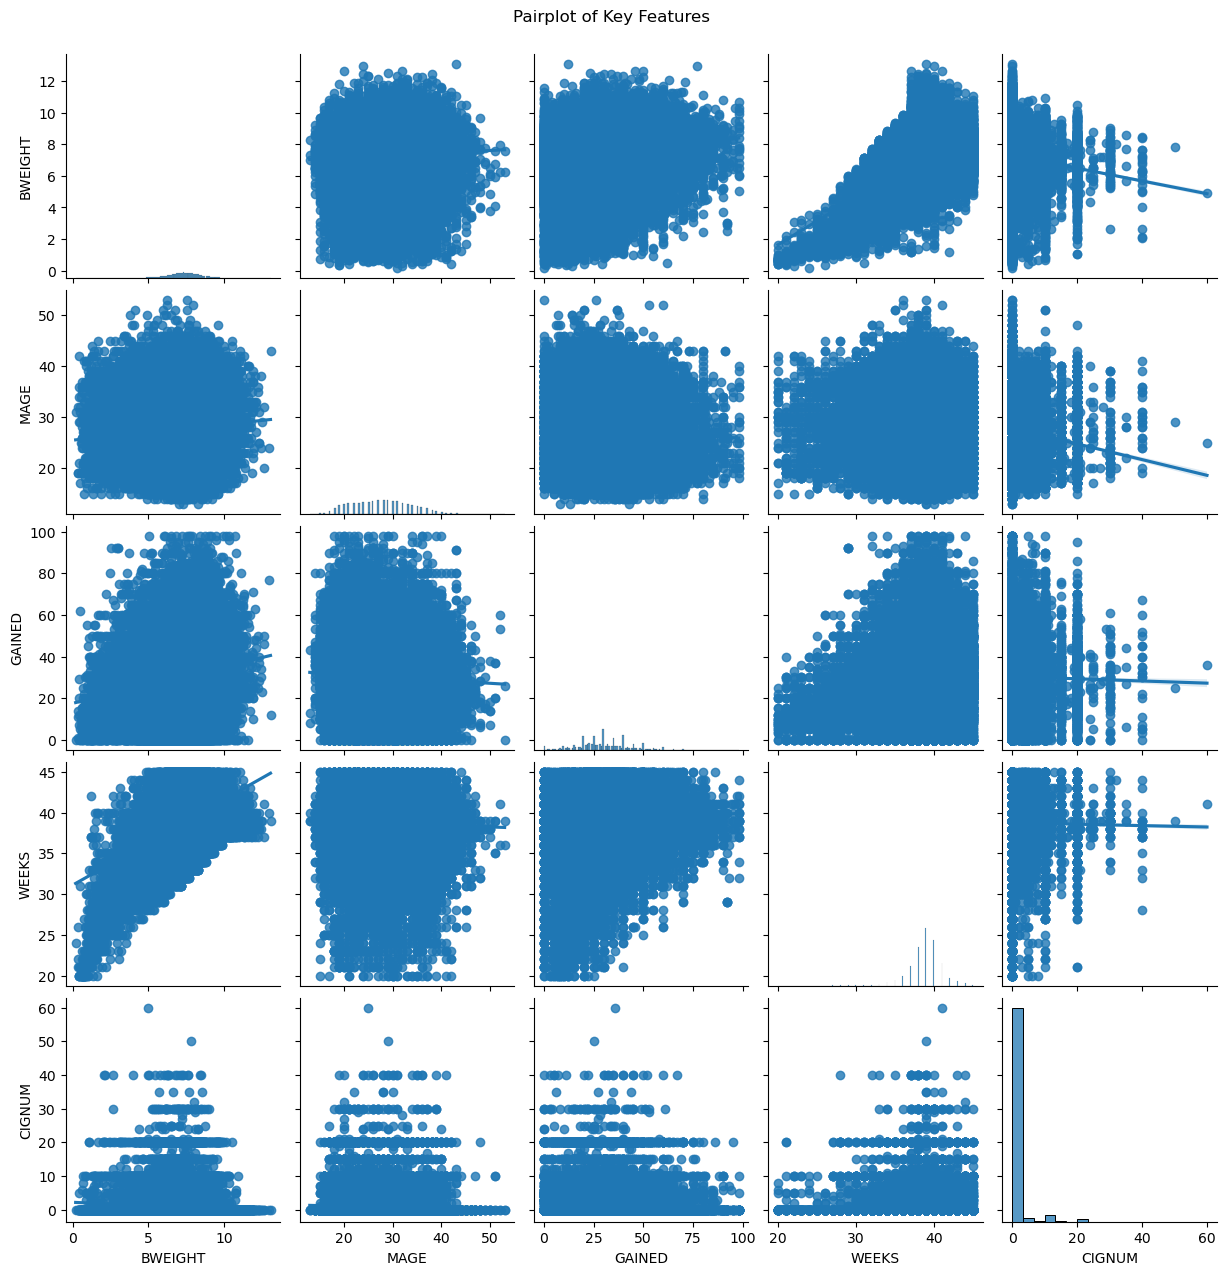

In [33]:
# Pairplot: Visual relationships between key features and target
sns.pairplot(df, vars=['BWEIGHT', 'MAGE', 'GAINED', 'WEEKS', 'CIGNUM'], kind='reg')
plt.suptitle('Pairplot of Key Features', y=1.02)
plt.show()

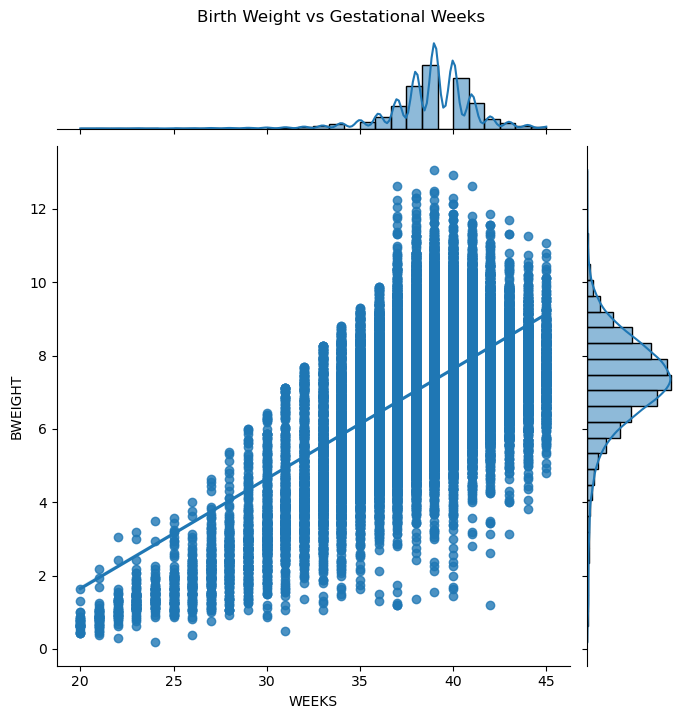

In [34]:
# Jointplot: Birth Weight vs Weeks of Gestation
sns.jointplot(x='WEEKS', y='BWEIGHT', data=df, kind='reg', height=7, marginal_kws=dict(bins=30))
plt.suptitle('Birth Weight vs Gestational Weeks', y=1.02)
plt.show()

## Birth Weight by Mother's Education

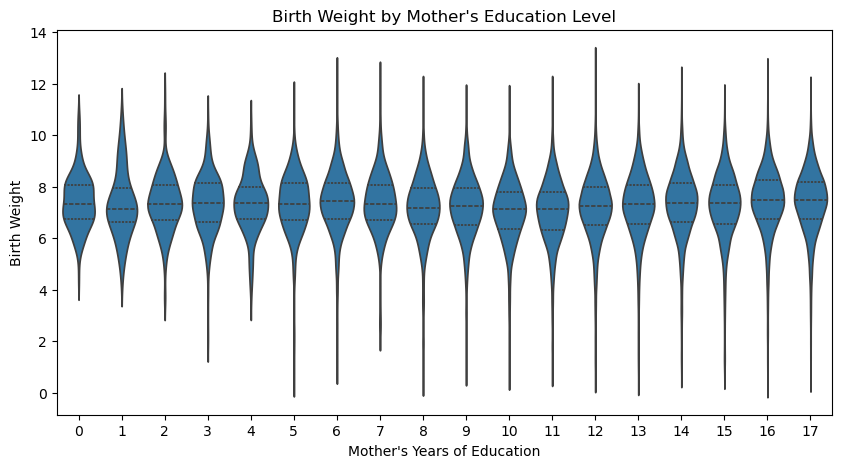

In [36]:
plt.figure(figsize=(10,5))
sns.violinplot(x='MEDUC', y='BWEIGHT', data=df, inner='quartile')
plt.title("Birth Weight by Mother's Education Level")
plt.xlabel("Mother's Years of Education")
plt.ylabel("Birth Weight")
plt.show()


## Machine learning part

Imports Needed for ML

In [48]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
import matplotlib.pyplot as plt
import time

## ML-Ready Data Cleaning (Only What’s Needed for ML)

In [51]:
# Drop irrelevant columns
df.drop(columns=['ID', 'NEWBORN_WEIGHT'], errors='ignore', inplace=True)

# Fill missing numeric with median, categorical with mode
for col in df.select_dtypes(include=['float64', 'int64']):
    if df[col].isnull().sum() > 0:
        df[col].fillna(df[col].median(), inplace=True)
for col in df.select_dtypes(include=['object', 'category']):
    if df[col].isnull().sum() > 0:
        df[col].fillna(df[col].mode()[0], inplace=True)

# Remove duplicates
df.drop_duplicates(inplace=True)

# Outlier removal for ML
df = df[(df['BWEIGHT'] >= 1.5) & (df['BWEIGHT'] <= 6)]
df = df[(df['WEEKS'] >= 20) & (df['WEEKS'] <= 45)]
df.reset_index(drop=True, inplace=True)


## Feature Engineering 

In [54]:
# Create engineered features
df['AVG_EDUC'] = (df['FEDUC'] + df['MEDUC']) / 2

health_flags = [
    'ANEMIA', 'CARDIAC', 'ACLUNG', 'DIABETES', 'HERPES', 'HYDRAM', 'HEMOGLOB',
    'HYPERCH', 'HYPERPR', 'ECLAMP', 'CERVIX', 'PINFANT', 'PRETERM', 'RENAL', 'RHSEN', 'UTERINE'
]
df['HEALTH_RISK_SUM'] = df[health_flags].sum(axis=1)


## Prepare X/y, Encode Categoricals

In [57]:
# Encode all categoricals with get_dummies
X = df.drop(columns=['BWEIGHT'], errors='ignore')
X = pd.get_dummies(X, drop_first=True)
y = df['BWEIGHT']

## Train/Test Split

In [60]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

##  Hyperparameter Tuning

In [63]:
# Random Forest
rf_params = {
    'n_estimators': [200, 300, 500],
    'max_depth': [6, 10, 15, 20, None],
    'min_samples_split': [2, 4, 8],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None]
}
print("\nStarting Random Forest tuning...")
start_rf = time.time()
rf_search = RandomizedSearchCV(
    RandomForestRegressor(random_state=42, n_jobs=-1),
    param_distributions=rf_params,
    n_iter=20,
    cv=4,
    scoring='neg_root_mean_squared_error',
    n_jobs=-1,
    random_state=42,
    verbose=2
)
rf_search.fit(X_train, y_train)
end_rf = time.time()
print(f"Random Forest tuning complete! Time: {(end_rf - start_rf)/60:.2f} minutes")
best_rf = rf_search.best_estimator_
y_pred_rf = best_rf.predict(X_test)



Starting Random Forest tuning...
Fitting 4 folds for each of 20 candidates, totalling 80 fits
Random Forest tuning complete! Time: 0.74 minutes


In [64]:
# XGBoost
xgb_params = {
    'n_estimators': [200, 300, 400, 500],
    'max_depth': [4, 6, 8, 10, 12],
    'learning_rate': [0.01, 0.03, 0.05, 0.1, 0.2],
    'subsample': [0.7, 0.8, 0.9, 1.0],
    'colsample_bytree': [0.7, 0.8, 0.9, 1.0],
    'gamma': [0, 0.1, 0.2, 0.3, 0.5],
    'min_child_weight': [1, 3, 5, 7]
}
print("\nStarting XGBoost tuning...")
start_xgb = time.time()
xgb_search = RandomizedSearchCV(
    XGBRegressor(random_state=42, n_jobs=-1, verbosity=0),
    param_distributions=xgb_params,
    n_iter=20,
    cv=4,
    scoring='neg_root_mean_squared_error',
    n_jobs=-1,
    random_state=42,
    verbose=2
)
xgb_search.fit(X_train, y_train)
end_xgb = time.time()
print(f"XGBoost tuning complete! Time: {(end_xgb - start_xgb)/60:.2f} minutes")
best_xgb = xgb_search.best_estimator_
y_pred_xgb = best_xgb.predict(X_test)



Starting XGBoost tuning...
Fitting 4 folds for each of 20 candidates, totalling 80 fits
XGBoost tuning complete! Time: 0.08 minutes


In [65]:
# LightGBM 
lgbm_params = {
    'n_estimators': [200, 300, 400, 500],
    'max_depth': [4, 6, 8, 10, 12],
    'learning_rate': [0.01, 0.03, 0.05, 0.1, 0.2],
    'subsample': [0.7, 0.8, 0.9, 1.0],
    'colsample_bytree': [0.7, 0.8, 0.9, 1.0],
    'reg_alpha': [0, 0.01, 0.03, 0.1, 0.2],
    'reg_lambda': [0, 0.01, 0.03, 0.1, 0.2]
}
print("\nStarting LightGBM tuning...")
start_lgbm = time.time()
lgbm_search = RandomizedSearchCV(
    LGBMRegressor(random_state=42, n_jobs=-1),
    param_distributions=lgbm_params, 
    n_iter=10,
    cv=4,
    scoring='neg_root_mean_squared_error',
    n_jobs=-1,
    random_state=42,
    verbose=2
)
lgbm_search.fit(X_train, y_train)
end_lgbm = time.time()
print(f"LightGBM tuning complete! Time: {(end_lgbm - start_lgbm)/60:.2f} minutes")
best_lgbm = lgbm_search.best_estimator_
y_pred_lgbm = best_lgbm.predict(X_test)


Starting LightGBM tuning...
Fitting 4 folds for each of 10 candidates, totalling 40 fits
[CV] END max_depth=6, max_features=None, min_samples_leaf=2, min_samples_split=8, n_estimators=300; total time=   3.8s
[CV] END max_depth=None, max_features=None, min_samples_leaf=1, min_samples_split=8, n_estimators=300; total time=  10.4s
[CV] END max_depth=6, max_features=log2, min_samples_leaf=1, min_samples_split=8, n_estimators=200; total time=   0.6s
[CV] END max_depth=6, max_features=None, min_samples_leaf=4, min_samples_split=4, n_estimators=500; total time=   6.5s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=8, n_estimators=500; total time=   3.2s
[CV] END max_depth=None, max_features=log2, min_samples_leaf=2, min_samples_split=4, n_estimators=300; total time=   1.5s
[CV] END max_depth=None, max_features=log2, min_samples_leaf=2, min_samples_split=4, n_estimators=500; total time=   2.6s
[CV] END max_depth=20, max_features=log2, min_samples_leaf=2, min

## Evaluation and Model Comparison

In [67]:
def print_metrics(name, y_true, y_pred):
    print(f"\n{name}:")
    print("R² Score:", r2_score(y_true, y_pred))
    print("RMSE:", np.sqrt(mean_squared_error(y_true, y_pred)))
    print("MAE:", mean_absolute_error(y_true, y_pred))

print_metrics("Random Forest (Tuned)", y_test, y_pred_rf)
print_metrics("XGBoost (Tuned)", y_test, y_pred_xgb)
print_metrics("LightGBM (Tuned)", y_test, y_pred_lgbm)


Random Forest (Tuned):
R² Score: 0.5857737020259403
RMSE: 0.6583430527633256
MAE: 0.48741920599762634

XGBoost (Tuned):
R² Score: 0.5932649796932221
RMSE: 0.6523628281912571
MAE: 0.4852744661260402

LightGBM (Tuned):
R² Score: 0.5938403375591663
RMSE: 0.6519012562864442
MAE: 0.48340922974356265


In [68]:
results = pd.DataFrame({
    'Model': ['Random Forest', 'XGBoost', 'LightGBM'],
    'R2 Score': [r2_score(y_test, y_pred_rf), r2_score(y_test, y_pred_xgb), r2_score(y_test, y_pred_lgbm)],
    'RMSE': [np.sqrt(mean_squared_error(y_test, y_pred_rf)), np.sqrt(mean_squared_error(y_test, y_pred_xgb)), np.sqrt(mean_squared_error(y_test, y_pred_lgbm))],
    'MAE': [mean_absolute_error(y_test, y_pred_rf), mean_absolute_error(y_test, y_pred_xgb), mean_absolute_error(y_test, y_pred_lgbm)]
})
print("\nModel Comparison:")
print(results)


Model Comparison:
           Model  R2 Score      RMSE       MAE
0  Random Forest  0.585774  0.658343  0.487419
1        XGBoost  0.593265  0.652363  0.485274
2       LightGBM  0.593840  0.651901  0.483409


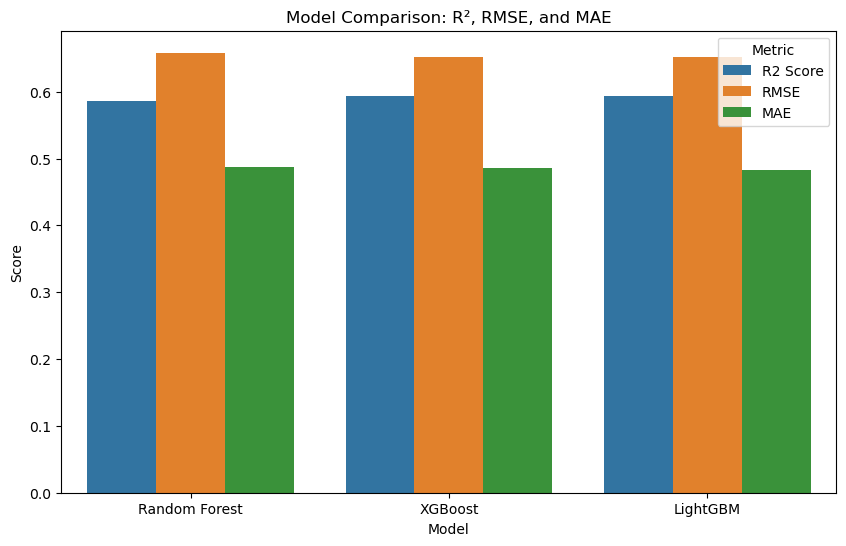

In [69]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'results' DataFrame as before
# Melt the DataFrame to long format
results_melted = results.melt(id_vars='Model', 
                              value_vars=['R2 Score', 'RMSE', 'MAE'],
                              var_name='Metric',
                              value_name='Score')

plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='Score', hue='Metric', data=results_melted)
plt.title("Model Comparison: R², RMSE, and MAE")
plt.ylabel("Score")
plt.xlabel("Model")
plt.legend(title="Metric")
plt.show()
